## Help for notebook

Type 'H' out of edit mode to see keyboard commands.

An important one for use is 'Shift + Enter' to run the selected cell, and select the next cell below.
Also, 'esc' can be used to exit edit mode.

### Instrutions for User

Read through the notebook. 

Wherever there is code, select the cell. Then run it with either the button at the top that looks sort of like a play button (next to the stop, and restart button), or with the keyboard pressing 'Shift + Enter'.

If you encounter any problems, or would like help with understanding something, please ask one of the volunteers.

I hope you enjoy! 😃

# Investigating the Titanic Dataset

## Introduction

[Titanic information](https://en.wikipedia.org/wiki/RMS_Titanic)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this walkthrough, you will analyze of what sorts of people were likely to survive. Various methods of analysis will be used. Don't worry if you don't fully understand how the code is working, if you are interested you'll have more time to learn later.

In [6]:
# Load the required tools for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Looking at the Dataset

In [7]:
# Here the file 'titanic-data.csv' is being loaded to be read in the notebook
# Feel free to see how that file looks
titanic_df = pd.read_csv('titanic-data.csv')

In [8]:
# How many passengers are there in this data?
len(titanic_df)

891

In [9]:
# Take a look at some of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What does this data mean? Read below. It will come in handy to know what everything here means once we start investigating it.

Data of 891 of the 2224 passengers and crew on board the Titanic

HEADING DESCRIPTIONS:
- survival:        Survival
                (0 = No; 1 = Yes)
- pclass:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
- name:            Name
- sex:             Sex
- age:             Age
- sibsp:           Number of Siblings/Spouses Aboard
- parch:           Number of Parents/Children Aboard
- ticket:          Ticket Number
- fare:            Passenger Fare
- cabin:           Cabin
- embarked:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

###### SPECIAL NOTES:
- NaN means the value is missing

- Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

- Age is in years; Fractional if Age less than One (1)
 If the Age is estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Data Analysis

Now is the time to start thinking of some questions that we would like to answer.

To do that, we'll take a more general look at the data to see if there are any trends.

In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Not too much going on here. The only interesting value seems to be with the Survived mean value at about 38%.

For the meaning of the row names:
- Count: Number of row counted in the data for this heading
- Mean: Average. Sum of values under the heading, divided by the total number of values under the heading
- Standard deviation: A little more complicated to understand, a statistics course would help here. But, it means by how much the values of the data deviate from the mean, or how much the data is spread out
- Min: Lowest value under the heading
- 25%: First quartile. Value the separates first quarter of the data, from the final three quarters
- 50%: The median. Value the separates first half of the data, from the final half
- 75%: Third quartile. Value the separates last quarter of the data, from the first three quarters
- Max: Highest value under the heading

In [11]:
titanic_df['Survived'].mean()

0.38383838383838381

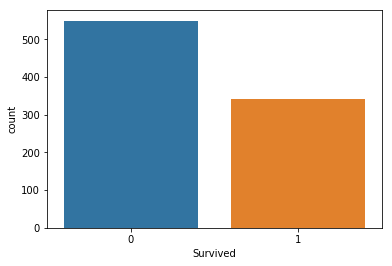

In [12]:
sns.countplot(x='Survived', data=titanic_df)

The 0.38 output means that 38% of the people recorded here survived. From the plot above counting the amount of values where '0' means, did not survive and '1' means survived, it can be seen about 350 people survived.

Why did so few people survive? Thakfully the answer can be understood with some historic knowledge.

The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,317 passengers and 885 crew members aboard (our data only contains a portion of all the people aboard the Titanic). 

It seems unlikely that all of the passengers would have had equal chances at survival given the limited amount of lifeboats. Who were able to get lifeboats then? Maybe it was the wealth, women, children, or something else? We should continue to search for answers in the data.

Before further analyzing, we should check out the distribution of the other variables. To see what to expect in the distribution of the outcome in the survivors.

Come back to view these plots for referenece later if need be.

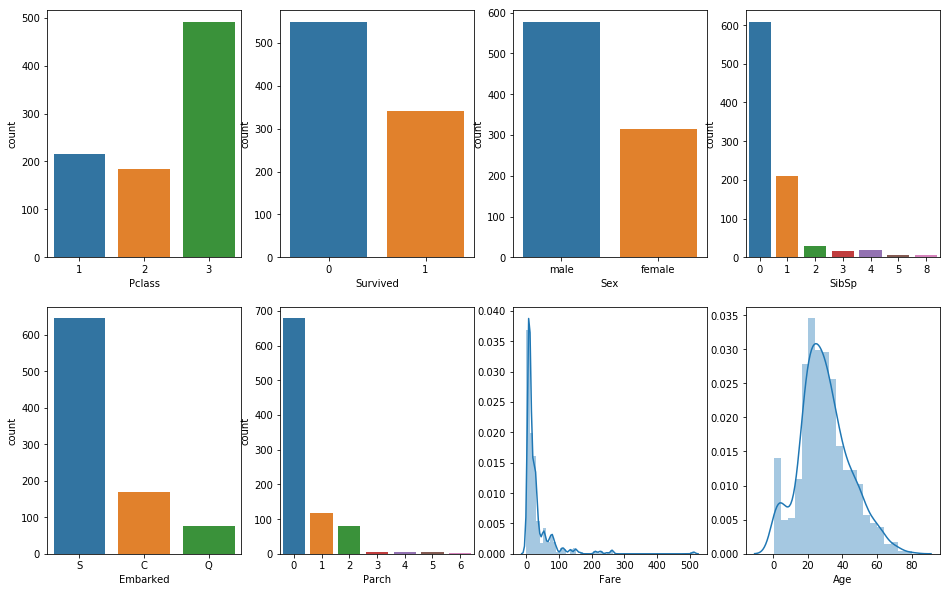

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10), sharex=False, sharey=False)

sns.countplot(x='Pclass', data=titanic_df, ax=axes[0,0])
sns.countplot(x='Survived', data=titanic_df, ax=axes[0,1])
sns.countplot(x='Sex', data=titanic_df, ax=axes[0,2])
sns.countplot(x='SibSp', data=titanic_df, ax=axes[0,3])
sns.countplot(x='Embarked', data=titanic_df, ax=axes[1,0])
sns.countplot(x='Parch', data=titanic_df, ax=axes[1,1])
sns.distplot(titanic_df['Fare'], ax= axes[1,2])
sns.distplot(titanic_df['Age'].dropna(), ax = axes [1,3]);

Now lets dive in the a question now. Did being wealthy increase your chances of survival on the Titanic?

To answer this, we will look at the social dynamics that determined who got a place on a lifeboat and who did not.

Social classes were heavily stratified in the early twentieth century. This was especially true on the Titanic, where the luxurious first-class areas were completely off limits to the middle-class passengers in second class, and especially to those who carried a third class “economy price” ticket. To get a view into the composition of each class, we can group data by class, and view the averages for each column.

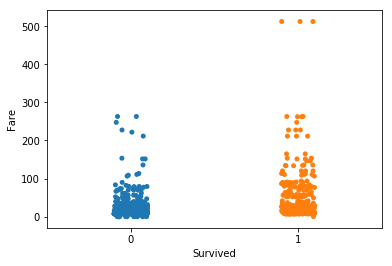

In [14]:
sns.stripplot(x="Survived", y="Fare", data=titanic_df , jitter=True)

To me, it's difficult to see any trends comparing the fare proce to who survived. Maybe more wealthy people survived from viewing this plot. We will plot this in a different way.

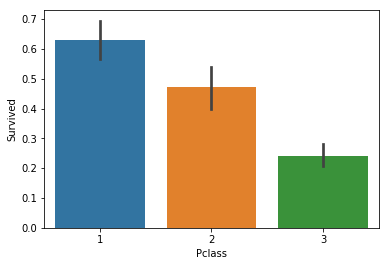

In [15]:
sns.barplot(x="Pclass", y="Survived", data=titanic_df)

What do you see from this plot?

For Pclass: 1 = first-class, 2 = second-class, and 3 = economy class

On the y-axis (left hand side of the plot), it displays the percentage of those passengers survived. So, for first class about 63% of those passengers survived.

Maybe there is some true to the wealthy having a better chance at surviving, considering the economy class was by far the largest class on the Titanic. The answer might be more complicated than we think though. I'll leave it for you to look up later in the day. 

For now, lets look at the other what questions posed. Did women and children have a better chance of survival?

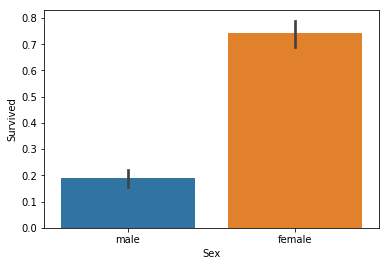

In [16]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

What conclusion do you come to here?

It would certainly help breaking this up by age to get a better understanding. And answer the final question about the survival of children.

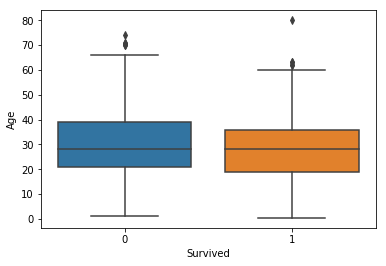

In [17]:
sns.boxplot(x="Survived", y="Age", data=titanic_df)

The boxplot isn't much help. It's showing the spread of the data by age.

   Gender Age Label  Survived
0  Female    Adults  0.778947
1  Female    Babies  1.000000
2  Female   Elderly  1.000000
3  Female     Young  0.656250
4    Male    Adults  0.184573
5    Male    Babies  0.800000
6    Male   Elderly  0.105263
7    Male     Young  0.262295


Text(0.5,1,'Survival Rate\nby\nAge Group and Gender')

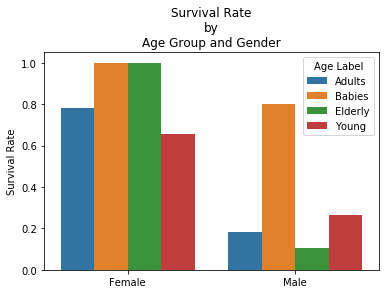

In [18]:
# Some black magic. If you know what functions are, you can probably figure out what is happening here.
def age_group(x):    
        if x <= 1:
            return 'Babies'
        if x > 1 and x <= 18:
            return 'Young'
        if x > 18 and x <= 60:
            return 'Adults'
        if x > 60:
            return 'Elderly'
titanic_data = titanic_df
titanic_data['Age Label'] = titanic_data.Age.apply(age_group)
titanic_data['Gender'] = titanic_data.Sex.map({'female' : 'Female', 'male' : 'Male'})
df = titanic_data.groupby(['Gender', 'Age Label'])['Survived'].mean().reset_index()
print(df)

sns.barplot(data = df, x = 'Gender', y = 'Survived', hue = 'Age Label')
plt.ylabel('Survival Rate')
plt.xlabel('')
plt.title('Survival Rate\nby\nAge Group and Gender')

Definitions:
- Babies: 1 year old or less
- Young: 1-18 years old
- Adults: 19-60 years old
- Elderly: Greater than 61 years old

I'll leave it up to you to determine what to think about this plot.

## Conclusion
###### The observations from our analysis uncovered the following:
- About 38% of the passengers survived.
- Most of the passengers were male. Also, many were considered lower class.
- Dispite this, wealthier passengers and females were more likely to survive from our findings.
- Of the survivors, babies and females made a large significant portion them.

## Resources to Continue Learning

Just a few resources. There are many, many more. From Khan Academy, Coursera, EdX, Sololearn, Youtube, Udacity, Datacamp, etc. The amount of free educational resources on the Internet are limitless. Google is your friend in finding them all.

Select the cell, then hit enter to see the links. Then a picture would probably help to capture everything.

#### Math
- [Khan Acadademy's Probability and Statistics](https://www.khanacademy.org/math/statistics-probability)
- [Coursera Statistics Specialization with R programmming language](https://www.coursera.org/specializations/statistics)

#### Programming
- [Interactive Python Programming Book](http://interactivepython.org/runestone/static/thinkcspy/index.html)
- [Coursera Python Specialication](https://www.coursera.org/specializations/python)

###### SQL database programming
- [Sololearn's SQL course](https://www.sololearn.com/Course/SQL/)
- [Khan Acadademy's SQL course](https://www.khanacademy.org/computing/computer-programming/sql)

#### Data Science Courses
- [Coursera Data Science Specialization](https://www.coursera.org/specializations/data-science-python)
- [Udacity's Intro to Data Science](https://www.udacity.com/course/intro-to-data-science--ud359)

#### YouTube Educator to Follow (I like this one)
- [Siraj Raval](https://www.youtube.com/sirajology)


##### Note:
These are resources if you're simply interested in learning more skills that may help with data analysis. Don't worry about not knowing the complex math you could encounter, you'll have a chance to learn that in university.


#### If you really enjoyed this, and may be thinking about trying this more, you should check out the following:
https://cognitiveclass.ai/partner-courses/data-science-high-school-vhs/

This is a High School Data Science course for Grade 12 level high school learners preparing for University. This first-of-its-kind interdisciplinary course in data science, course code IDC4U, is offered online and students earn a full credit from the Ministry of Education in Canada’s largest province, Ontario. This credit is recognized by universities and colleges in Canada and all over the world.

Please ask your teachers and parents about this before taking the course.